# MNIST Classification

Algorithms used: Stochastic Gradient Descent Classification & Random Forest Classification<br>
Date: 02/09/2019<br>
Author: Pranay Saha<br>
<b>Note:</b>  MNIST dataset is downloaded from Keras (uses tensorflow as a dependency.)

In [40]:
#from sklearn.datasets import fetch_mldata
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#mnist= fetch_mldata('MNIST original')

In [41]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

X_train.resize((60000,784))
print(X_train)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(random_state= 42)

In [43]:
model.fit(X_train, y_train)

/home/pranay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [44]:
X_test.resize((10000,784))

3


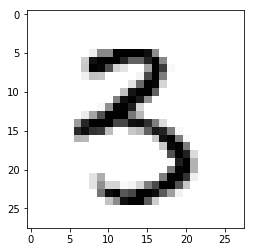

In [65]:
dig=X_test[5000]
print(y_test[5000])

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.imshow(dig.reshape(28,28), cmap= matplotlib.cm.binary)
#plt.axis("off")
plt.show()

In [46]:
model.predict([dig])

array([3], dtype=uint8)

In [74]:
pred_labels= model.predict(X_test)
print(pred_labels)
X_test.shape

[7 2 1 ... 4 5 6]


(10000, 784)

In [50]:
from sklearn.metrics import accuracy_score

score= accuracy_score(y_test, pred_labels)
print(score*100)

84.53


In [53]:
from sklearn.ensemble import RandomForestRegressor

model_1= RandomForestRegressor()
model_1.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [71]:
pred_labels_rfC= model_1.predict(X_test)
print(pred_labels_rfC)

[7.  2.6 1.  ... 4.3 5.  6. ]


In [73]:
# score_rfC= accuracy_score(y_test, pred_labels_rfC)
# print(score_rfC*100)

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_labels)

array([[ 954,    0,   11,    3,    0,    1,    3,    2,    1,    5],
       [   0, 1128,    5,    0,    0,    1,    1,    0,    0,    0],
       [   5,   24,  939,    9,    7,    0,    8,    8,   22,   10],
       [   4,   11,   69,  836,    1,   23,    2,   10,    7,   47],
       [   1,   13,   12,    2,  767,    0,    9,    3,    3,  172],
       [  15,   14,   34,   33,   11,  658,   12,    8,   45,   62],
       [  14,    5,   51,    2,    5,   10,  868,    0,    1,    2],
       [   1,   18,   27,    2,    6,    0,    2,  855,    1,  116],
       [  12,  106,   58,   20,   12,   58,    4,    8,  487,  209],
       [   7,   13,    9,    5,    5,    1,    1,    4,    3,  961]])